# Model Project 2021: Solow model with economical damage from climate change

The aim of the project is to solve the basic Solow model and then extend the model to account for economical damage from climate change. 

**The project is organized as follows:**

1. Model project description
2. Model description
3. Classic Solow model
4. Extended Solow model (with economical damage from climate change)
5. Conclusion

**Group:** SSTL

**Members:** Louise Otte Arildsen (srb330), Signe Kolind (hmk792), Stine Fürst (qvj635) & Thomas Nielsen (qzw392)

**Imports and set magics:**

In [22]:
import modelproject
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import sympy as sm
import ipywidgets as widgets

# Model description

$$
\begin{align}
Y_{t}&=[1-D] K_{t}^{\alpha}\left(A_{t} L_{t}\right)^{1-\alpha}, 0<\alpha<1 \\
D&=1-\frac{1}{1+\sigma(\Delta T)^{2}}, \sigma>0 \\
K_{t+1}&=s Y_{t}+(1-\delta) K_{t}, 0<s<1,0<\delta<1, K_{0}>0  \\
A_{t+1}&=(1+g) A_{t}, A_{0}>0  \\
L_{t+1}&=(1+n) L_{t}, L_{0}>0
\end{align}
$$

$$
\tilde{y}_{t} \equiv \frac{Y_{t}}{A_{t} L_{t}}=\frac{y_{t}}{A_{t}} ; \quad \tilde{k}_{t} \equiv \frac{K_{t}}{A_{t} L_{t}}=\frac{k_{t}}{A_{t}}
$$

Equation (1) is a Cobb-Douglas production function, which describes production (Yt) as a function of capital (Kt), population size (Lt), and the level of technology (At). The model assumes that climate changes reduce production with a share D, meaning that a share of the production (DYt) is damaged and can not be used. The share (1-D) of the production can be used for consumption and investment. Equation 2 describes the damage caused by climate change, where \DeltaT measures the temperature change. Equation (3) describes the development of capital, where s is the saving rate and delta is the depreciation rate. Equation (4) and (5) describes how the level of technology (At) and the population size develops over time.

# Classic Solow model (D=0)

When assuming $D=0$ the model reduces to the classic Solow model, which we will solve in this section.

## Analytical solution

The transition equation of the model for capital per effective worker is given by: 

$$
\tilde{k}_{t+1}=\frac{1}{(1+n)(1+g)}\left(s \tilde{k}_{t}^{\alpha}+(1-\delta) \tilde{k}_{t}\right)
$$

Note that convergence requires that $n+g+\delta+ng >0$.

The intuition behind the convergence result is decreasing marginal product on capital and constant depletion/attrition. In steady-state this implies that the savings are just as large as they cover for depreciation and thinning of resources.

First we define all the **symbols** using sympy:

In [23]:
y = sm.symbols('y')
k = sm.symbols('k')
K = sm.symbols('K')
alpha = sm.symbols('alpha')
sigma = sm.symbols('sigma')
deltaT = sm.symbols('delta T')
s = sm.symbols('s')
delta = sm.symbols('delta')
g = sm.symbols('g')
n = sm.symbols('n')

Then we define the **steady state equation**

In [24]:
ss = sm.Eq(k,(s*k**alpha+(1-delta)*k)/((1+n)*(1+g)))

and **solve** it

In [25]:
kss = sm.solve(ss,k)[0]
kss

((delta + g*n + g + n)/s)**(1/(alpha - 1))

For later use, we turn the solution into a **Python funciton**

In [26]:
#transforming the function to a python function
ss_func = sm.lambdify((s,g,n,alpha,delta),kss)

In [27]:
#Defining parameters
s = 0.3
g = 0.02
n = 0.01
alpha = 1/3
delta = 0.05

In [28]:
print(f'analytical solution is: {ss_func(s,g,n,alpha,delta):.3f}')

analytical solution is: 7.235


In steady state the capital per effective worker equals 7.235.

## Numerical solution

We can re-write the equation for the steady state capital per capita as

$$
\tilde{k}_{t+1}-\frac{1}{(1+n)(1+g)}\left(s \tilde{k}_{t}^{\alpha}+(1-\delta) \tilde{k}_{t}\right)=0
$$

whereby it clearly becomes a **root-finding problem**. Such a problem can be solved by various methods. 

In the section below, the problem will be solved from the **brent-** and **bisection method** in order to compare the robustness of our results.


### Bisection Method

In [294]:
def solve_for_ss(s,g,n,alpha,delta):
    """ solve for the steady state level of capital

    Args:
        s (float): saving rate
        g (float): technological growth rate
        n (float): population growth rate
        alpha (float): cobb-douglas parameter
        delta (float): capital depreciation rate 

    Returns:
        result (RootResults): the solution represented as a RootResults object

    """ 
    
    # a. define objective function
    obj_kss = lambda kss: kss - (s*kss**alpha + (1-delta)*kss)/((1+g)*(1+n))

    #. b. call root finder
    result = optimize.root_scalar(obj_kss,bracket=[0.1,100],method='bisect')
    
    return result


#Solve numerically for the steady state:
bisect_solution = solve_for_ss(s,g,n,alpha,delta)
print(f' The numerical solution, calculated from the bisect method is: {bisect_solution.root:}')

 The numerical solution, calculated from the bisect method is: 7.234696712204852


### Brent Method

In [295]:
def solve_for_brent(s,g,n,alpha,delta):
    """ solve for the steady state level of capital

    Args:
        s (float): saving rate
        g (float): technological growth rate
        n (float): population growth rate
        alpha (float): cobb-douglas parameter
        delta (float): capital depreciation rate 

    Returns:
        result (RootResults): the solution represented as a RootResults object

    """ 
    
    # a. define objective function
    obj_kss = lambda kss: kss - (s*kss**alpha + (1-delta)*kss)/((1+g)*(1+n))

    #. b. call root finder
    result = optimize.root_scalar(obj_kss,bracket=[0.1,100],method='brentq')
    
    return result

#Solve numerically for the steady state:
brent_solution = solve_for_brent(s,g,n,alpha,delta)
print(f'The numerical solution, calculated from the brent method, is: {brent_solution.root:}')

The numerical solution, calculated from the brent method, is: 7.234696712205987




When comparing our numerical and analytical results, it is clear that our results are quite robust, only differing by few decimals:

In [303]:
print(f'Analytical solution : {ss_func(s,g,n,alpha,delta):}')
print(f'Bisect solution     : {bisect_solution.root:}')
print(f'Brent solution      : {brent_solution.root:}')


Analytical solution : 7.234696712206231
Bisect solution     : 7.234696712204852
Brent solution      : 7.234696712205987


Because our results seem robust, we choose to rely on a single optimization method, when climate change is introduced from section 4 in the extended model. 

## BNP pr. effektiv arbejder uden klimaforandringer (D = 0)

Solution:

$$
\tilde{y}^{*^{\prime}}=\left(\frac{s}{n+g+\delta+n g}\right)^{\frac{\alpha}{1-\alpha}}
$$

## solve with sumpy
Using equation (1) (6) and the solution


## Simulation of the classic Solow model

We want to simulate the classic Solow model, to show how the models converges to the steady state, $\tilde{k}^*$

This function simulates the classic Solow model for $T=100$ periods.

In [33]:
k0 =1
T = 120
D = 0

In [34]:
k_path = modelproject.simulate_solow_model(k0,alpha,delta,s,n,g,T,D)

AttributeError: module 'modelproject' has no attribute 'simulate_solow_model'

This function represents the steady state value:

In [268]:
k_star = modelproject.find_ssk_k(delta,g,n,alpha,s,D)
k_stars =[k_star for i in range(T)]

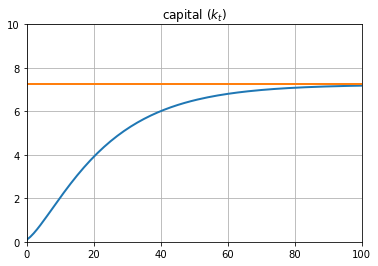

In [269]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(k_path[:T], lw=2)
ax.plot(k_stars,lw=2)
ax.set_title('capital ($k_t$)')
ax.set_xlim([0,100])
ax.set_ylim([0,10])
ax.grid(True);

# The Solow model with economical damage from climate change (D>0)

In this section we consider an extension of the classic Solow model, which includes economical damage from climate change. D represents the reduction in production due to climate change and we now assume that D>0.  

## Analytical solution

Solution:
$$
\tilde{k}_{t+1}=\frac{1}{(1+n)(1+g)}\left(s[1-D] \tilde{k}_{t}^{\alpha}+(1-\delta) \tilde{k}_{t}\right)
$$

Then we define the **steady state equation**

In [13]:
# introducing climate effects
y = sm.symbols('y')
k = sm.symbols('k')
K = sm.symbols('K')
alpha = sm.symbols('alpha')
sigma = sm.symbols('sigma')
deltaT = sm.symbols('delta T')
s = sm.symbols('s')
delta = sm.symbols('delta')
g = sm.symbols('g')
n = sm.symbols('n')
D = sm.symbols('D')

# climate steady state
css = sm.Eq(k,(((s*(1-D)*(k**alpha))+((1-delta)*k)))/((1+n)*(1+g)))

and **solve** it:

In [14]:
kcss = sm.solve(css,k)[0]
kcss

((-delta - g*n - g - n)/(s*(D - 1)))**(1/(alpha - 1))

In [15]:
#transforming the function to a python function
css_func = sm.lambdify((s,g,n,alpha,delta,D),kcss)

In [16]:
#Defining parameters
s = 0.3
g = 0.02
n = 0.01
alpha = 1/3
delta = 0.05
D=0.175
print(f'analytical solution is: {css_func(s,g,n,alpha,delta,D):.3f}')

analytical solution is: 5.421


In steady state the capital per effective worker equals 5.421.

## Numerical solution

In [17]:
def solve_for_css(s,g,n,alpha,delta,D):
    """ solve for the steady state level of capital

    Args:
        s (float): saving rate
        g (float): technological growth rate
        n (float): population growth rate
        alpha (float): cobb-douglas parameter
        delta (float): capital depreciation rate 

    Returns:
        result (RootResults): the solution represented as a RootResults object

    """ 
    
    # a. define objective function
    obj_kcss = lambda kcss: kcss - (s*(1-D)*kcss**alpha + (1-delta)*kcss)/((1+g)*(1+n))

    #. b. call root finder
    result = optimize.root_scalar(obj_kcss,bracket=[0.1,100],method='bisect')
    
    return result



In [18]:
solution_2 = solve_for_css(s,g,n,alpha,delta,D)

print(f'analytical solution is: {css_func(s,g,n,alpha,delta,D):.3f}')
print(f' numerical solution is: {solution_2.root:.3f}')

analytical solution is: 5.421
 numerical solution is: 5.421


## BNP pr. effektiv arbejder uden klimaforandringer (D = 0.175)

## Visulization

**Describe graph**

In [240]:
widgets.interact(modelproject.simulate_basic, 
                k     = widgets.fixed(0), 
                alpha = widgets.FloatSlider(description = '$\u03B1$' , min = 0 ,    max = 0.9 , step = 0.05 , value = 1/3),
                delta = widgets.FloatSlider(description = '$\u03B4$' , min = 0 ,    max = 0.5 , step = 0.01 , value = 0.05),
                s     = widgets.FloatSlider(description = 's' ,        min = 0.01 , max = 0.3 , step = 0.005 , value = 0.3),
                n     = widgets.FloatSlider(description ='$n$',        min = 0.01 , max = 0.1 , step = 0.005, value = 0.01),
                g     = widgets.FloatSlider(description ='$g$',        min = 0.01 , max = 0.1 , step = 0.005, value = 0.02),
                D     = widgets.FloatSlider(description ='$D$',        min = 0.0 , max = 1 , step = 0.005, value = 0),
                K     = widgets.fixed(1),
                T     = widgets.IntSlider(description='$T$' ,          min = 1,     max = 1000, step = 10,    value = 10))

interactive(children=(FloatSlider(value=0.3333333333333333, description='$α$', max=0.9, step=0.05), FloatSlide…

<function modelproject.simulate_basic(k, alpha, delta, s, n, g, K, T, D)>

## Comparison with classic Solow model

# Conclusion

ADD CONCISE CONCLUSION.